Mario Gibson Maia Pinto - 1924979 - MBA em Ciência de Dados - Processamento de Linguagem Natural - Professor Luciano Gallegos

***
**Resumo do Trabalho**

Este trabalho realiza o processamento de palavras do livro "Dom Casmurro" de Machado de Assis (1). Foram realizadas as etapas de tokenização, lematização, *stemming*, *POS-tagging* e análise de *stopwords*.

Foram também gerados gráficos exibindo os personagens mais citados; menções destes ao longo da trama; frequência de ocorrência das palavras; marcações gramaticais, verbos e pronomes mais utilizados.

Também foi utilizado o recurso de "nuvem de palavras" para exibir os seguintes dados: verbos e adjetivos associados a um personagem, citações de personagens em conjunto e o contexto de palavras ao qual cada personagem (entre os mais citados) estavam inseridos.

Por fim, são gerados alguns dados relacionados à similaridade de ocorrências de palavras, para cada personagem, e termos considerados mais significantes no texto.

***
**Solução Técnica**

Após o carregamento do *corpus* a ser analisado, contido em um arquivo no formato *txt*, foi realizado o *parsing* das palavras com a utilização do modelo "pt_core_news_sm" da biblioteca *Spacy* (2), modelo estatístico pré-treinado para a língua portuguesa (3).

O *Spacy* foi utilizado para a realização dos processamentos das palavras com exceção da lematização, realizada com a biblioteca Natural Languague Toolkit - NLTK (4). Esta biblioteca também foi utilizada para o cálculo da frequência de palavras contidas no *corpus*; para as funções de *concordance*; e para funções de geração de similaridades e *collocations*.

Os resultados dos processamentos foram consolidados e armazenados em um *dataframe* para facilitar a visualização e manipulação dos dados obtidos.

Para a geração dos gráficos foram utilizados recursos de plotagem do Pandas e da biblioteca Matplotlib. Para a geração das nuvens de palavras, foi utilizada a biblioteca *WordCloud* (5).

***
**Importação de bibliotecas**

In [823]:
## importando bibliotecas

## Spacy
import spacy
import pandas as pd

## NLTK
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from string import punctuation

## Gráficos
import matplotlib.pyplot as plt

## Outras
import numpy as np
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /home/mario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mario/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


***
**Carregamento do corpus**

In [824]:
## configurando o caminho do arquivo
path = '/home/mario/Documentos/Aulas/PNL/Trabalho/dom_casmurro.txt'

## carregando o corpus
book_raw = open(path).read()

## realizando o parsing
nlp = spacy.load("pt_core_news_sm")
book_spacy = nlp(book_raw)

***
**Processamento das palavras**

Nesta seção, são realizados os processamentos das palavras descritos abaixo. Todos eles, com exceção do *Stemming*, realizado com a biblioteca NLTK, são processados com a utilização do *Spacy*, pois este não oferece suporte ao processamento citado.

- Tokenização
- Lemmatização
- Part-of-speech Tagging (POS-tagging)
- Explicação da POS-tagging
- Análise de stopword
- Stemming

O dataframe montado ao final do processo auxiliará na recuperação dos dados para a geração dos gráficos de marcações gramaticais, verbos, adjetivos e pronomes mais utilizados, mostrados a seguir.

In [825]:
## montagem do dataframe com informações dos processamentos realizados com a utilização do Spacy
cols = ("token", "lemma", "POS", "POS_explain", "stopword")
rows = []

for t in book_spacy:
    row = [t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
    rows.append(row)

df = pd.DataFrame(rows, columns=cols)


## incluindo uma nova coluna ao dataframe para adicionar resultados do stemming utilizando o NLTK
stemmer = SnowballStemmer(language='portuguese')

list_stem = []

for (i, row) in df.iterrows():
    stem = stemmer.stem(row['token'])
    list_stem.append(stem)
    
df['stem'] = pd.Series(list_stem, index=df.index)

In [826]:
## exibindo 25 primeiros registros como exemplo
df.head(25)

,token,lemma,POS,POS_explain,stopword,stem
0,CAPÍTULO,CAPÍTULO,PROPN,proper noun,False,capítul
1,PRIMEIRO,PRIMEIRO,ADV,adverb,True,primeir
2,/,/,NOUN,noun,False,/
3,DO,DO,PROPN,proper noun,True,do
4,TÍTULO,TÍTULO,PROPN,proper noun,False,títul
5,\n,\n,SPACE,space,False,\n
6,Uma,Uma,DET,determiner,True,uma
7,noite,noite,NOUN,noun,False,noit
8,destas,destas,PRON,pronoun,False,dest
9,",",",",PUNCT,punctuation,False,","


***
Gráfico exibindo as **marcações gramaticais** das palavras da obra

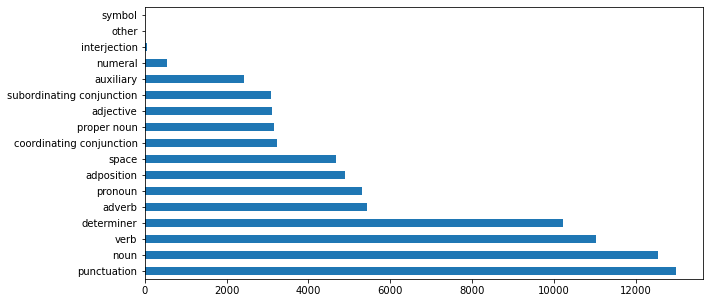

In [827]:
df.POS_explain.value_counts().plot(kind='barh', figsize=(10, 5))

***
Gráfico exibindo os **verbos na forma lematizada mais utilizados** na obra

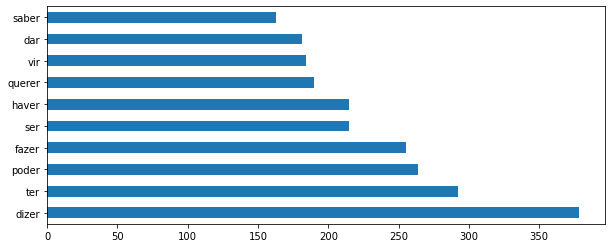

In [828]:
df_verbs = df.query('POS == "VERB"')
df_verbs.lemma.value_counts()[:10].plot(kind='barh', figsize=(10, 4))

***
Gráfico exibindo os **adjetivos na forma lematizada mais utilizados** na obra

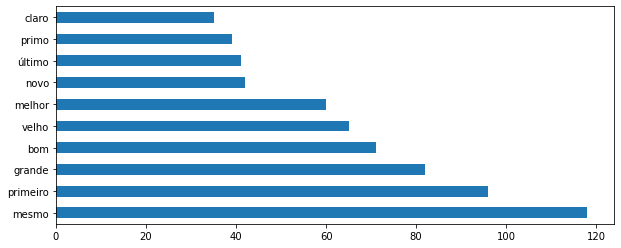

In [829]:
df_verbs = df.query('POS == "ADJ"')
df_verbs.lemma.value_counts()[:10].plot(kind='barh', figsize=(10, 4))

***
Gráfico exibindo **pronomes mais utilizados** na obra

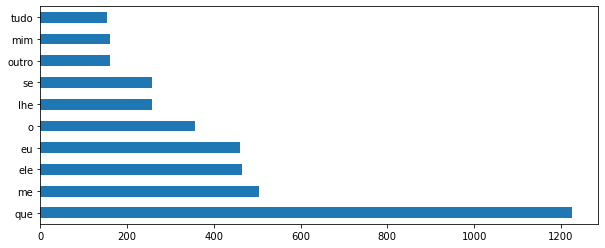

In [830]:
df_verbs = df.query('POS == "PRON"')
df_verbs.lemma.value_counts()[:10].plot(kind='barh', figsize=(10, 4))

***
Gráfico exibindo **personagens mais citados** na obra

Para a construção deste gráfico, foram consideradas as "entidades" selecionadas pelo *Spacy* classificadas como *PERSON*.

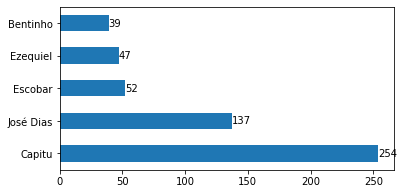

In [831]:
names = []

for ent in book_spacy.ents:
    if (ent.label_ == 'PER'):
        names.append(ent.text)

df_names = pd.DataFrame(names)

df_names[0].value_counts()[:5].plot(kind='barh', figsize=(6, 3))

for index, value in enumerate(df_names[0].value_counts()[:5]):
    plt.text(value, index, str(value), verticalalignment='center')

***
Gráfico exibindo as **menções aos personagens mais citados** ao longo da obra (6)

In [832]:
def locations(needle, haystack): 
    return pd.Series(np.histogram(
        [word.i for word in haystack 
         if word.text.lower() == needle], bins=50)[0])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc78284e050>,
      dtype=object)

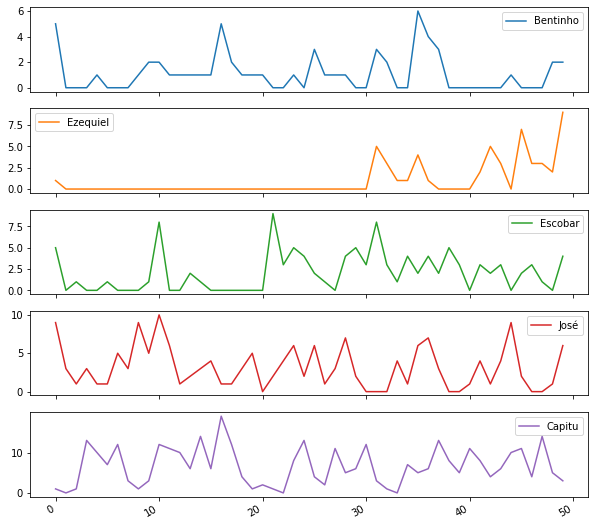

In [833]:
pd.DataFrame(
    {name: locations(name.lower(), book_spacy) for name in ['Bentinho', 'Ezequiel', 'Escobar', 'José', 'Capitu']}
).plot(subplots=True, figsize=(10, 10))

**Observação**

Nota-se que o personagem **Ezequiel** começou a ser citado **bem posteriormente** na história mas, apesar disso, é um dos personagens mais citados (até mesmo que o personagem **Bentinho**).

***

**Nuvens de palavras**

As seguintes nuvens de palavras foram geradas para cada personagem mais citado (Na ordem: Capitu, José Dias, Escobar, Ezequiel e Bentinho):
- Adjetivos relativos ao personagem;
- Verbos relacionados ao personagem;
- Outros personagens que são citados em conjunto com o personagem.

In [834]:
## função para geração de nuvens de palavras a partir de uma lista de strings
def generate_word_cloud(words_list, lower_case):
    
    if (len(words_list) > 0):   
        words=""

        # Criando string a partir das palavras        
        for word in words_list:
            if (lower_case):
                words = words + ' ' + word.lower()
            else:
                words = words + ' ' + word
                
        ## configurando stopwords para desconsiderar partículas verbais (exemplo: voltando-me)
        stopwords = set(STOPWORDS)
        stopwords.update(['lhe','se','la','las','lo','los','me','as','a','o','no','nos','na','nas'])
        
        wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(words)

        plt.figure(figsize=(8,4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

Nuvem de palavras com **adjetivos que descrevem os personagens mais citados**

Para a seleção dos adjetivos, foram selecionadas as sentenças em que cada personagem foi citado. Cada sentença, então, foi detalhada em uma estrutura de árvore, onde cada palavra possuía nós filhos. 
Para cada nó pertencente ao nome de um personagem, foram analisados seus filhos e verificados se estes possuíam adjetivos. Foi considerado que estes adjetivos, filhos desses nós de personagem, o descreveriam.

In [835]:
def adjectives_describing_characters(text, character):
    sents = [sent for sent in text.sents if character in sent.string]
    adjectives = []
    for sent in sents: 
        for word in sent: 
            if character in word.string:
                for child in word.children: 
                    if child.pos_ == 'ADJ' and child.is_stop == False: 
                        adjectives.append(child.string.strip())
                        adjectives.append(character)
    return adjectives

**Capitu**

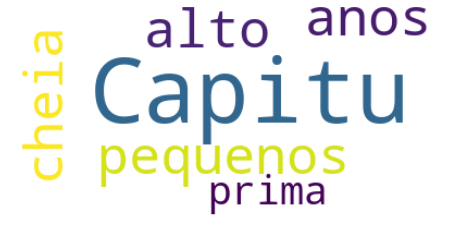

In [886]:
generate_word_cloud(adjectives_describing_characters(book_spacy,'Capitu'),False)

**José Dias**

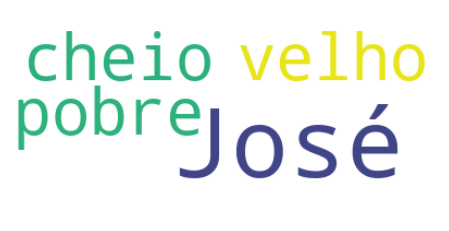

In [885]:
generate_word_cloud(adjectives_describing_characters(book_spacy,'José'),False)

**Escobar**

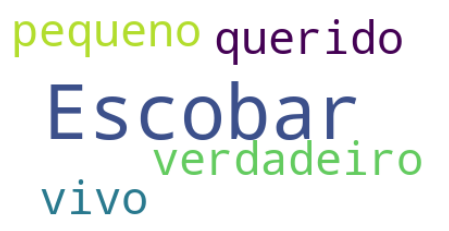

In [884]:
generate_word_cloud(adjectives_describing_characters(book_spacy,'Escobar'),False)

**Ezequiel**

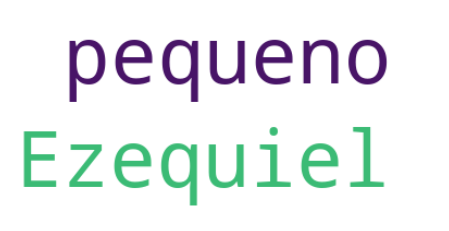

In [883]:
generate_word_cloud(adjectives_describing_characters(book_spacy,'Ezequiel'),False)

**Bentinho**

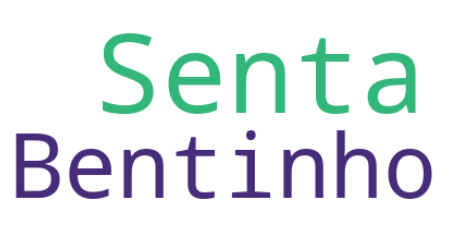

In [882]:
generate_word_cloud(adjectives_describing_characters(book_spacy,'Bentinho'),False)

**Observações**

Na nuvens de adjetivos da personagem Capitu foi observada a ocorrência da palavra "anos". De fato, como é verificado a seguir, esta palavra possui sim esta classificação, em alguns pontos do texto.

In [901]:
df_anos = df.query('token == "anos" and POS == "ADJ"')
df_anos

,token,lemma,POS,POS_explain,stopword,stem
11947,anos,ano,ADJ,adjective,False,anos
53407,anos,ano,ADJ,adjective,False,anos


Já para o termo "Senta", exibido na nuvem de palavras do personagem Bentinho, verificou-se que o termo foi proveniente da junção da pontuação travessão, utilizado no *corpus*, simbolizado por "--" e o termo "Senta", provavelmente um erro. Este termo foi classificado como adjetivo pelo *Spacy* conforme mostrado a seguir:

In [896]:
adjectives_describing_characters(book_spacy,'Bentinho')

['--Senta', 'Bentinho']

In [900]:
df_senta = df.query('token == "--Senta" and POS == "ADJ"')
df_senta

,token,lemma,POS,POS_explain,stopword,stem
52425,--Senta,--Senta,ADJ,adjective,False,--sent


***
Nuvem de palavras com **verbos relacionados aos personagens mais citados**

Para a seleção dos verbos, o processo foi similar à seleção de adjetivos, com a diferença de que a árvore foi percorrida até encontrar o primeiro verbo da frase, a partir do nome do personagem. O verbo foi considerado na forma lematizada.

In [841]:
def verbs_for_characters(text, character):
    sents = [sent for sent in text.sents if character in sent.string]
    charWords = []
    for sent in sents: 
        for word in sent: 
            if character in word.string: 
                charWords.append(word)
    charAdjectives = []
    for word in charWords: 
        for ancestor in word.ancestors: 
            if ancestor.pos_.startswith('V') and ancestor.is_stop == False: 
                charAdjectives.append(ancestor.lemma_.strip())
                charAdjectives.append(character)
    return charAdjectives

**Capitu**

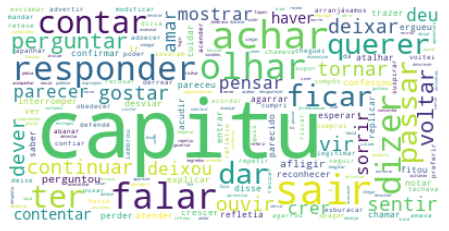

In [842]:
generate_word_cloud(verbs_for_characters(book_spacy,'Capitu'),True)

**José Dias**

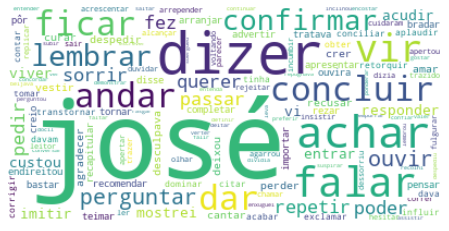

In [843]:
generate_word_cloud(verbs_for_characters(book_spacy,'José'),True)

**Escobar**

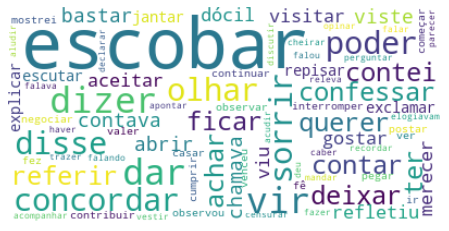

In [844]:
generate_word_cloud(verbs_for_characters(book_spacy,'Escobar'),True)

**Ezequiel**

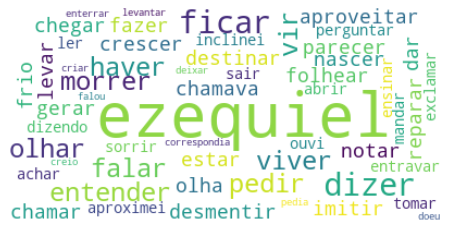

In [845]:
generate_word_cloud(verbs_for_characters(book_spacy,'Ezequiel'),True)

**Bentinho**

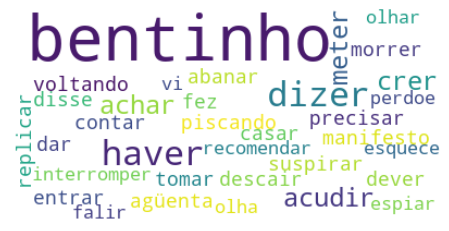

In [846]:
generate_word_cloud(verbs_for_characters(book_spacy,'Bentinho'),True)

**Observação**

Nas nuvens geradas pode ser observada a presença de verbos na forma não lematizada como o termo "voltando", presente na nuvem acima, por exemplo. Estes verbos possuíam párticulas como "-se" e o "-lhe" que não foram descartadas no processo de lematização realizado pelo *Spacy*. Na função de geração das *clouds* estas partículas foram configuradas como *stopwords* e suprimidas, para que não aparecessem "soltas" nas nuvens de palavras.

Para ilustrar a explicação do parágrafo anterior, segue abaixo o registro do processamento do termo "voltando-se", exibindo o resultado de seu processo de lemmatização:

In [903]:
df_voltando = df[df['token'] == 'voltando-se']
df_voltando['lemma'][:1]

9261    voltando-se
Name: lemma, dtype: object

***

Nuvens de palavras contendo quais **outros personagens foram mais citados conjuntamente com os personagens mais citados**

Para a seleção dos personagens em conjunto, fora selecionadas as sentenças em que cada personagem foi citado, e a partir disto verificado se, nesta sentença, havia alguma entidade identificada pelo *Spacy* como *PERSON*. Para melhorar o resultado, foi adicionada uma regra verificando se o nome também era iniciado com letra maiúscula.

In [848]:
def characters_together(text, character):
    sents = [sent for sent in text.sents if character in sent.string]
    characters = []
    for sent in sents: 
        for word in sent.ents: 
            if word.text == character or (word.label_ == 'PER' and word.text[0].isupper()):
                characters.append(word.text)
    return characters

**Capitu**

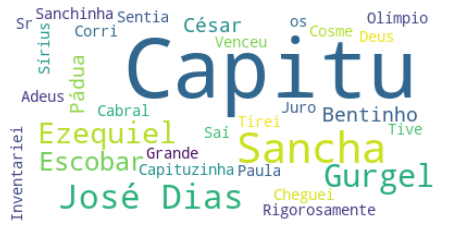

In [849]:
generate_word_cloud(characters_together(book_spacy, 'Capitu'),False)

**José Dias**

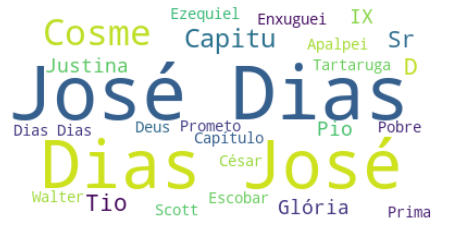

In [850]:
generate_word_cloud(characters_together(book_spacy, 'José Dias'),False)

**Escobar**

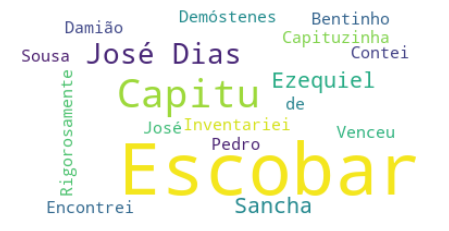

In [851]:
generate_word_cloud(characters_together(book_spacy, 'Escobar'),False)

**Ezequiel**

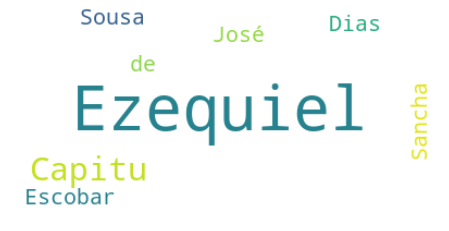

In [852]:
generate_word_cloud(characters_together(book_spacy, 'Ezequiel'),False)

**Bentinho**

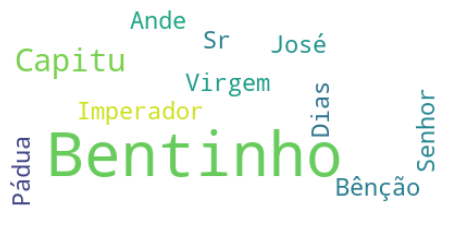

In [853]:
generate_word_cloud(characters_together(book_spacy, 'Bentinho'),False)

**Observação**

Nas nuvens de palavras acima observa-se a existência de alguns termos como "D", "Sr", "de", entre outros, que aparentemente são de nomes compostos identificados pelo *Spacy* e que acabaram sendo separados pela função de geração da *cloud*.

***

A partir deste ponto este trabalho utilizará somente a biblioteca NLTK. Foi executada uma nova tokenização e a limpeza de palavras irrelevantes encontradas no *corpus* (excluindo-se stopwords e pontuações, identificadas pelo NLTK).

No processo de limpeza, foi necessário que fossem consideradas novas pontuações a serem descartadas pois nem todas estas encontradas no texto constavam na lista de pontuações providas pelo NTLK.

In [854]:
import re

def pre_process(words):  
    punctuation2 = ['...','\'\'','--']
    stopwords = nltk.corpus.stopwords.words('portuguese') + list(punctuation) + punctuation2
    new_words=[]
    for word in words:
        if word.lower() not in stopwords and word.lower():
            new_words.append(word.lower())    
            
    return new_words

In [855]:
## gerando tokens utilizando o NLTK
tokens = word_tokenize(book_raw, language='portuguese')

## removendo as palavras irrelevantes
tokens = pre_process(tokens)

***
Gráfico exibindo a **frequência das palavras** utilizadas na obra

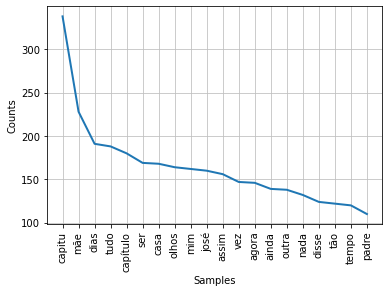

In [856]:
freq = nltk.FreqDist(tokens)
freq.plot(20, cumulative=False)

***
Exibindo as **nuvens de palavras contendo o contexto a que cada personagem mais citado é inserido** 

Nesta seção, é realizada a geração de nuvens de palavras contendo o contexto (de palavras) em que cada personagem (entre os mais citados) está inserido.

Para possibitar esta análise, foi utilizada a função *concordance*, disponibilizada pela biblioteca NLTK. Este recurso possibilita obter a percepção de qual contexto a palavra está inserida, selecionando as palavras que rodeiam a palavra-alvo, até um determinado alcance.

No exemplo abaixo observa-se a saída do recurso para a palavra "Capitu":

In [857]:
book = nltk.Text(tokens)
book.concordance('capitu',lines=10)

Displaying 10 of 338 matches:
asta idade bentinho mal quinze anos capitu fez quatorze semana passada dous cr
ousa brincadeira arranjávamos altar capitu servia sacristão alterávamos ritual
e viva ar mesma opinião então amava capitu capitu mim realmente andava cosido 
ar mesma opinião então amava capitu capitu mim realmente andava cosido saias o
retanto matéria conversações sempre capitu chamava-me vezes bonito mocetão flo
indíssimos fazer dizia lindos então capitu abanava cabeça grande expressão des
ia alguma frase algum gesto contava capitu dia notou diferença dizendo bonitos
fenômeno recente acordar pensamento capitu escutá-la memória estremecer ouvia 
ndade demais virtudes eternas amava capitu capitu amava-me pernas andavam desa
emais virtudes eternas amava capitu capitu amava-me pernas andavam desandavam 


Este método, porém, não possibilita a reutilização dos dados de retorno pois ele simplesmente imprime no console os resultados de seu processamento. Para driblar esta limitação, foi utilizado o método abaixo que salva os resultados do *concordance* em uma lista (7). Isto possibilitará a geração das nuvens de palavras mostradas adiante.

In [858]:
from nltk.text import ConcordanceIndex

def concordance(ci, word, width=75, lines=25):
    """
    Rewrite of nltk.text.ConcordanceIndex.print_concordance that returns results
    instead of printing them. 

    See:
    http://www.nltk.org/api/nltk.html#nltk.text.ConcordanceIndex.print_concordance
    """
    half_width = (width - len(word) - 2) // 2
    context = width // 4 # approx number of words of context

    results = []
    offsets = ci.offsets(word)
    if offsets:
        lines = min(lines, len(offsets))
        for i in offsets:
            if lines <= 0:
                break
            left = (' ' * half_width +
                    ' '.join(ci._tokens[i-context:i]))
            right = ' '.join(ci._tokens[i+1:i+context])
            left = left[-half_width:]
            right = right[:half_width]
            results.append('%s %s %s' % (left, ci._tokens[i], right))
            lines -= 1

    return results

Nuvem de palavras exibindo o contexto em que a personagem **Capitu** está inserida.

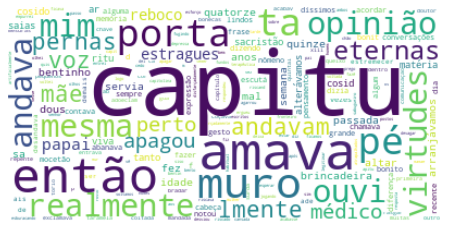

In [859]:
ci = ConcordanceIndex(tokens)
results = concordance(ci, 'capitu')
generate_word_cloud(results, True)

Nuvem de palavras exibindo o contexto em que o personagem **José Dias** está inserido.

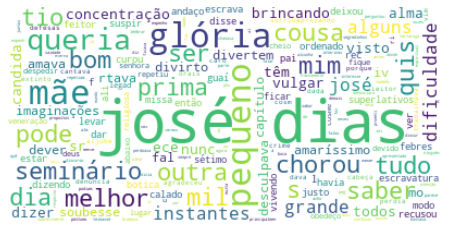

In [860]:
ci = ConcordanceIndex(tokens)
results = concordance(ci, 'josé')
generate_word_cloud(results, True)

Nuvem de palavras exibindo o contexto em que o personagem **Escobar** está inserido.

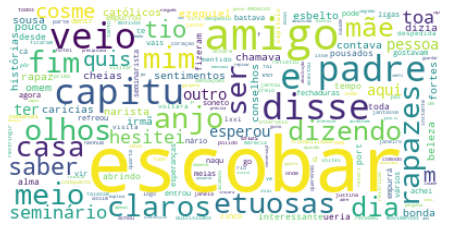

In [861]:
ci = ConcordanceIndex(tokens)
results = concordance(ci, 'escobar')
generate_word_cloud(results, True)

Nuvem de palavras exibindo o contexto em que o personagem **Ezequiel** está inserido.

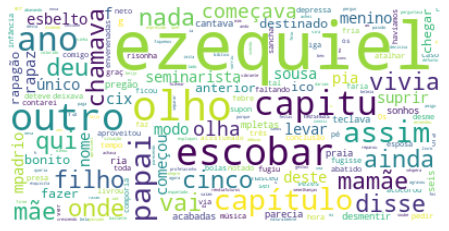

In [862]:
ci = ConcordanceIndex(tokens)
results = concordance(ci, 'ezequiel')
generate_word_cloud(results, True)

Nuvem de palavras exibindo o contexto em que o personagem **Bentinho** está inserido.

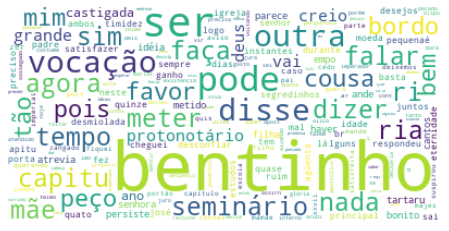

In [863]:
ci = ConcordanceIndex(tokens)
results = concordance(ci, 'bentinho')
generate_word_cloud(results, True)

*** 

**Similaridades**

Esta seção utiliza a função *similar* do NLTK que encontra as palavra com distribuição de texto similar à palavra alvo. Serão exibidos os resultados novamente para os personagens mais citados.

In [864]:
book.similar('Capitu')

ainda assim ninguém si podia logo diga diante bom beijo olhou ouvira
rogado coro


In [865]:
book.similar('José Dias')

No matches


In [866]:
book.similar('Escobar')

assim então metendo consentir


In [867]:
book.similar('Ezequiel')

moça bentinho sempre possíveis papai comandante


*** 

**Colocações significativas**

For fim, nesta seção, é utilizada a função *collocations* do NLTK que exibe as sequências de palavras que ocorrem juntas com maior frequência no *corpus*.

In [868]:
book.collocations()

josé dias; prima justina; tio cosme; padre cabral; pode ser; outra
vez; alguns instantes; alguma cousa; outra cousa; muita vez; dia
seguinte; engenho novo; ser padre; protonotário apostólico; rio
janeiro; mana glória; quinze anos; podia ser; quis saber; devia ser


***

**Conclusão**

Neste trabalho foram utilizados recursos de Processamento de Linguagem Natural das bibliotecas *Spacy* e *NLTK* para o processamento das palavras da obra em questão. Estes recursos ajudaram na identificação de características dos personagens, da relevância destes para a trama e das interações ocorridas entre estes.

Na maioria das análises realizadas os resultados obtidos foram satisfatórios com algumas exceções explicitadas por meio de observações produzidas ao longo do trabalho. 

***
**Fontes**

(1) LeLivros - https://lelivros.love/book/dom-casmurro-machado-de-assis-epub-pdf-mobi/

(2) Spacy Usage - https://spacy.io/usage

(3) Spacy Core Models - https://spacy.io/models/pt

(4) Natural Language Processing with Python. - http://www.nltk.org/book/

(5) Generating WordClouds in Python. - https://www.datacamp.com/community/tutorials/wordcloud-python

(6) Material disponibilizado na disciplina de PNL - Prof. Luciano Gallegos

(7) How to save NLTK concordance results in a list? - https://stackoverflow.com/questions/47649987/how-to-save-nltk-concordance-results-in-a-list